In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import linear_model

from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve. This code is outdated.
from sklearn import metrics

## 
from sklearn.linear_model import LinearRegression


## Tensorflow stuff:
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
!pip install -q -U keras-tuner
import kerastuner as kt

np.random.seed(42)

# Import additional libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Importing Smote
from imblearn.over_sampling import SMOTE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.8 MB/s eta 0:00:00


<ipython-input-1-af81d72c2b7c>:31: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
## Importing the dataset: 
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/ResaleFlatPrice.csv")




## If done on local machine, uncomment this line of code:
## df = pd.read_csv("/Users/junlongng/Desktop/NTU/Year_2/Semester 2/BC3415 AI in ACC & Finance/Week 4 Regression/Homework/Loan Default (Employed).csv")


Mounted at /content/drive


In [3]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [4]:
## Checking for null values
df.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

In [5]:
df["flat_model"].value_counts()

Model A                   7664
Improved                  5560
New Generation            3056
Premium Apartment         2122
Simplified                 930
Apartment                  816
Maisonette                 662
Standard                   647
DBSS                       310
Model A2                   254
Model A-Maisonette          46
Adjoined flat               46
Type S1                     37
Type S2                     16
Terrace                     14
Multi Generation            14
Premium Apartment Loft       4
Premium Maisonette           4
Improved-Maisonette          2
Name: flat_model, dtype: int64

In [6]:
df = df.loc[:, ['town', 'flat_type','floor_area_sqm','flat_model', 'lease_commence_date', "resale_price"]]

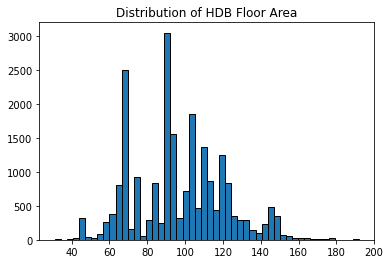

In [7]:
plt.hist(df['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Distribution of HDB Floor Area')
plt.show()

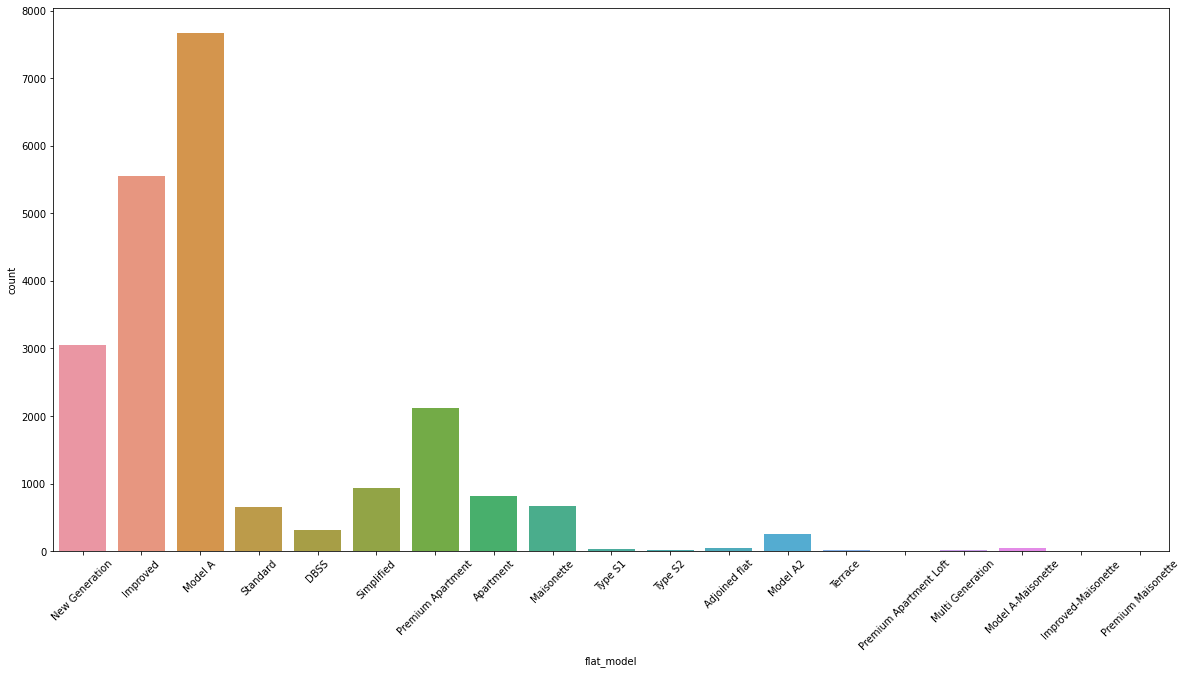

In [8]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x = 'flat_model', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()



In [9]:
## Normalizing Z score value for floor area / SQM
df['floor_area_sqm'] = stats.zscore(df['floor_area_sqm'])

In [10]:
## Encoding variables
d = pd.get_dummies(df['town'])
df = df.merge(d,left_index=True, right_index = True).drop(columns ="town")

In [11]:
d = pd.get_dummies(df['flat_model'])
df = df.merge(d,left_index=True, right_index = True).drop(columns ="flat_model")

In [12]:
d = pd.get_dummies(df['flat_type'])
df = df.merge(d,left_index=True, right_index=True).drop(columns = "flat_type")

In [13]:
df.head()

,floor_area_sqm,lease_commence_date,resale_price,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,...,Terrace,Type S1,Type S2,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI-GENERATION
0,-1.193788,1981,270000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.988498,1976,295000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-1.234846,1978,270000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.234846,1978,230000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.193788,1981,262500.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
## Target Variable (Y) shall be the resale price:
X = df.drop(columns ="resale_price")
Y = df['resale_price']

In [15]:
## Train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [16]:
## Using Linear Model since Target Y is a numerical attribute
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("RMSE using linear model is: " , mean_squared_error(Y_test, pred)**0.5)

RMSE using linear model is:  62049.157229095465


In [43]:
## Using a CART Model:

tree_model = tree.DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train,Y_train)
pred = tree_model.predict(X_test)
print("RMSE using CART model is: ", mean_squared_error(Y_test, pred)**0.5)

RMSE using CART model is:  42382.99128194354


In [44]:
## Using GridSearchCV to lower RMSE
from sklearn.model_selection import GridSearchCV

tree_model = tree.DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10, 15]
}

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)
print("RMSE using tuned CART model is: ", mean_squared_error(Y_test, best_pred)**0.5)


RMSE using tuned CART model is:  76678.97770097812


In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a decision tree regressor object
tree_model = DecisionTreeRegressor(random_state=42)

# Define the parameter grid to search over
param_grid = {'max_depth': range(1, 11),
              'min_samples_split': range(2, 11),
              'min_samples_leaf': range(1, 11)}

# Define the scorer to use for cross-validation
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create a grid search object
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring=scorer)

# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# Get the best decision tree model from the grid search
best_tree_model = grid_search.best_estimator_

# Prune the tree using cost complexity pruning
path = best_tree_model.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
    
# Compute the mean squared error for each decision tree model
test_scores = [mean_squared_error(Y_test, clf.predict(X_test)) for clf in clfs]

# Select the best decision tree model based on the minimum mean squared error
best_idx = np.argmin(test_scores)
best_tree_model = clfs[best_idx]

# Compute the RMSE of the pruned decision tree model
pred = best_tree_model.predict(X_test)
print("RMSE using pruned CART model is: ", mean_squared_error(Y_test, pred)**0.5)

## Error decreased


RMSE using pruned CART model is:  41116.29913661563


In [51]:
## Using a Random Forest Model:
model = ensemble.RandomForestRegressor(random_state = 42)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("RMSE for RF model is ", mean_squared_error(Y_test,pred)**0.5)

RMSE for RF model is  39372.20824782279


In [ ]:
## Optimizing a RF model using Gridsearch CV:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest regressor object
model = RandomForestRegressor(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# Get the best random forest model from the grid search
best_model = grid_search.best_estimator_

# Make predictions and compute the RMSE
pred = best_model.predict(X_test)
print("RMSE for optimized RF model is ", mean_squared_error(Y_test, pred)**0.5)


In [49]:
## Using a XGBoost Model:
model = ensemble.GradientBoostingRegressor(random_state=42)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("RMSE for XG Boost is ", mean_squared_error(Y_test, pred)**0.05)

RMSE for XG Boost is  3.0158085186124235


In [20]:
## Using a Neural Network Model:
model = neural_network.MLPRegressor(random_state =42)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("RMSE for NN is ", mean_squared_error(Y_test, pred)**0.05)

RMSE for NN is  3.297730480688955


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
## Using Keras to make NN, with activation function of relu & linear
model = Sequential()
model.add(Dense(54,input_dim = 54, activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(54,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="linear"))
model.add(Dropout(0.2))
model.compile(loss="mse", optimizer="adam", metrics=['mse'])
history = model.fit(X_train,Y_train,batch_size = 50, epochs = 50)

Epoch 1/50
334/334 [==============================] - 2s 3ms/step - loss: 163523985408.0000 - mse: 163523985408.0000
Epoch 2/50
334/334 [==============================] - 1s 2ms/step - loss: 65939771392.0000 - mse: 65939771392.0000
Epoch 3/50
334/334 [==============================] - 1s 2ms/step - loss: 63249858560.0000 - mse: 63249858560.0000
Epoch 4/50
334/334 [==============================] - 1s 2ms/step - loss: 63365918720.0000 - mse: 63365918720.0000
Epoch 5/50
334/334 [==============================] - 1s 2ms/step - loss: 62375272448.0000 - mse: 62375272448.0000
Epoch 6/50
334/334 [==============================] - 1s 3ms/step - loss: 64626864128.0000 - mse: 64626864128.0000
Epoch 7/50
334/334 [==============================] - 1s 3ms/step - loss: 64670887936.0000 - mse: 64670887936.0000
Epoch 8/50
334/334 [==============================] - 1s 3ms/step - loss: 62929989632.0000 - mse: 62929989632.0000
Epoch 9/50
334/334 [==============================] - 1s 3ms/step - loss: 6275

In [22]:
result = model.evaluate(X_test,Y_test)


174/174 [==============================] - 0s 2ms/step - loss: 26480914432.0000 - mse: 26480914432.0000


In [23]:
result[1]**0.5

162729.57454623914

In [24]:
167341.04978755213


167341.04978755213

<p> As we can see keras, NN is not very optimized yet. Perhaps the reason for this is that the loss has not converged to a local minima. Hence, the model is still quite error prone. Need more training.

---



<h3> Pros of the model:

<p> The model seems to perform really well using SciKit learn's NN model as well as the XGboost model. This might suggest that the model has high predictive accuracy and is not as easily affected by outliers and noise in the data. 

<h3> Cons of the model

<p> The model seems to perform well in NN, this might suggest that the model's success is attributable to 'black-box' methods where the model is too complex and we are unable to truly understand what goes on behind the model and how it is able to achieve such accuracy. This could also suggest that the model is overfitted because of the fact that XGboost & Neural Networks are models that can be prone to overfitting.

Another weakness is that the data is only based off on 1 year's worth of data, and is tailored towards Singapore's data on HDB.


<h3> Overcomming Limitations of model

<P> We could use regularization techniques to help combat model overfitting, we would also need to set the dropout rate for the model such that it can also help prevent the model from overfitting the data. 

<p> We could also use new unseen data for this model such that it is trained on a larger set of information rather than just one year's worth of HDB data.

---